## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 200
BATCH_SIZE = 1024
MOMENTUM = 0.95
name_tag = ['EStop w val acc', 'earlystop=10', 'earlystop=25']

In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

results = {}
for name in name_tag:
    keras.backend.clear_session()
    print("Experiment with %s" % (name))
    if name == 'EStop w val acc':
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=5, 
                          verbose=1)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop])
    elif name == 'earlystop=10':
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=10, 
                          verbose=1)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop])
    else:
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=25, 
                          verbose=1)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop])    
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%s" % str(name)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with EStop w val acc
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batc

50000/50000 [==============================] - 5s 110us/step - loss: 1.2029 - accuracy: 0.5854 - val_loss: 1.4731 - val_accuracy: 0.4771
Epoch 15/200
50000/50000 [==============================] - 5s 108us/step - loss: 1.1773 - accuracy: 0.5962 - val_loss: 1.4620 - val_accuracy: 0.4845
Epoch 16/200
50000/50000 [==============================] - 5s 106us/step - loss: 1.1551 - accuracy: 0.6029 - val_loss: 1.4545 - val_accuracy: 0.4809
Epoch 17/200
50000/50000 [==============================] - 5s 107us/step - loss: 1.1323 - accuracy: 0.6117 - val_loss: 1.4545 - val_accuracy: 0.4907
Epoch 18/200
50000/50000 [==============================] - 5s 107us/step - loss: 1.1099 - accuracy: 0.6193 - val_loss: 1.4610 - val_accuracy: 0.4858
Epoch 19/200
50000/50000 [==============================] - 5s 108us/step - loss: 1.0883 - accuracy: 0.6301 - val_loss: 1.4598 - val_accuracy: 0.4952
Epoch 20/200
50000/50000 [==============================] - 5s 107us/step - loss: 1.0666 - accuracy: 0.6358 - val

50000/50000 [==============================] - 6s 116us/step - loss: 1.0797 - accuracy: 0.6319 - val_loss: 1.4623 - val_accuracy: 0.4941
Epoch 21/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.0570 - accuracy: 0.6392 - val_loss: 1.4640 - val_accuracy: 0.4911
Epoch 22/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.0390 - accuracy: 0.6466 - val_loss: 1.4675 - val_accuracy: 0.4942
Epoch 23/200
50000/50000 [==============================] - 5s 106us/step - loss: 1.0156 - accuracy: 0.6565 - val_loss: 1.4697 - val_accuracy: 0.4943
Epoch 24/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.9954 - accuracy: 0.6639 - val_loss: 1.4682 - val_accuracy: 0.4920
Epoch 25/200
50000/50000 [==============================] - 5s 107us/step - loss: 0.9754 - accuracy: 0.6713 - val_loss: 1.4605 - val_accuracy: 0.4966
Epoch 26/200
50000/50000 [==============================] - 5s 109us/step - loss: 0.9555 - accuracy: 0.6794 - val

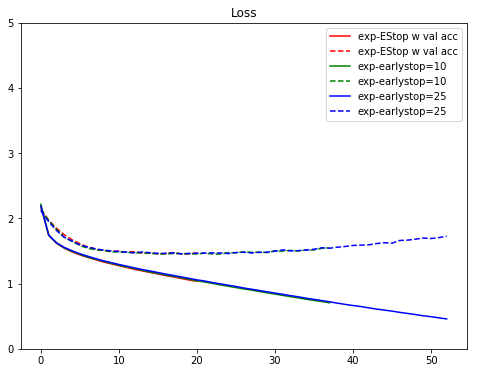

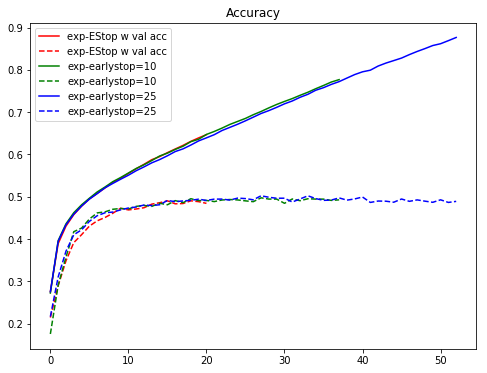

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()